C:\Users\priya\AppData\Local\Temp\ipykernel_4380\2118257810.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2025-01-01', periods=5000, freq='H'),


🚗 Initial Model MAE: 6.15
🚗 Initial Model R2 Score: -0.17
Fitting 3 folds for each of 12 candidates, totalling 36 fits
🚦 Optimized Model MAE: 5.77
🚦 Optimized Model R2 Score: -0.04


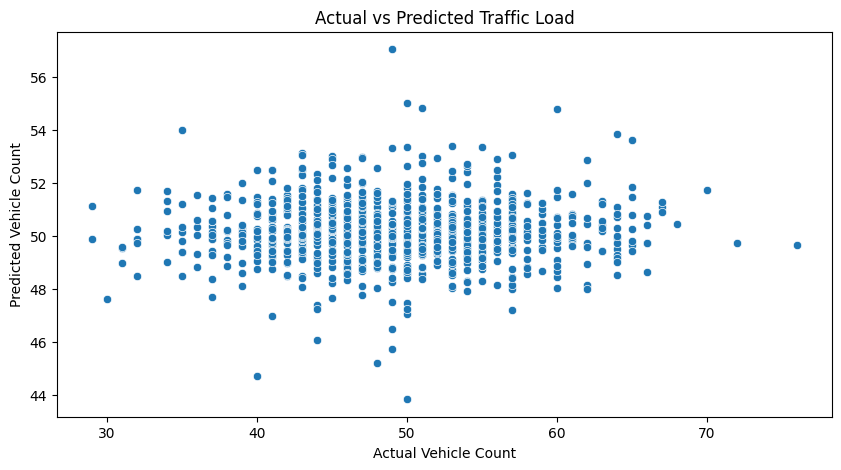

📡 Starting Real-Time Data Simulation...
🔄 Real-Time Data: {'location_id': 18, 'weather_code': 1, 'event_code': 0, 'temperature': 21.78502212649781} => Predicted Vehicle Count: 49.24
🔄 Real-Time Data: {'location_id': 9, 'weather_code': 3, 'event_code': 1, 'temperature': 13.182320681359837} => Predicted Vehicle Count: 49.64
🔄 Real-Time Data: {'location_id': 18, 'weather_code': 2, 'event_code': 2, 'temperature': 13.53187231958853} => Predicted Vehicle Count: 49.96
🔄 Real-Time Data: {'location_id': 11, 'weather_code': 2, 'event_code': 3, 'temperature': 18.192440137747653} => Predicted Vehicle Count: 50.17
🔄 Real-Time Data: {'location_id': 18, 'weather_code': 2, 'event_code': 1, 'temperature': 23.664209034988165} => Predicted Vehicle Count: 48.99
🔒 Encrypted Data: b'gAAAAABoFNPUSJcKgQLgjb0TuDQ-3ORHWe7kEwy0XRCtPckuX6x4_vJ9HzLJpnF95P_JP7VZnC3Oa6cFeNBoDErbr6WT8sDjkF2P_uPbs0m_-RyW5AD-6ciKkHNF2BzfK-q28jfoyk28w8YBy7DWAqFCw2NJoW6OGA=='
🔓 Decrypted Data: Location: 5, Vehicle Count: 80, Timestamp: 2

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from cryptography.fernet import Fernet
import time
import random
np.random.seed(42)

# Simulate 5000 rows of traffic data
data = {
    'timestamp': pd.date_range(start='2025-01-01', periods=5000, freq='H'),
    'location_id': np.random.randint(1, 20, 5000),
    'vehicle_count': np.random.poisson(lam=50, size=5000),
    'weather': np.random.choice(['Clear', 'Rain', 'Fog', 'Snow'], 5000),
    'event': np.random.choice(['None', 'Concert', 'Sports', 'Parade'], 5000),
    'temperature': np.random.normal(loc=20, scale=5, size=5000),
}

df = pd.DataFrame(data)

# Encode categorical data
df['weather_code'] = df['weather'].map({'Clear': 0, 'Rain': 1, 'Fog': 2, 'Snow': 3})
df['event_code'] = df['event'].map({'None': 0, 'Concert': 1, 'Sports': 2, 'Parade': 3})

df.head()

X = df[['location_id', 'weather_code', 'event_code', 'temperature']]
y = df['vehicle_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🚗 Initial Model MAE: {mae:.2f}")
print(f"🚗 Initial Model R2 Score: {r2:.2f}")

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred_optimized = best_model.predict(X_test)

# Evaluate
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
r2_opt = r2_score(y_test, y_pred_optimized)

print(f"🚦 Optimized Model MAE: {mae_opt:.2f}")
print(f"🚦 Optimized Model R2 Score: {r2_opt:.2f}")

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_optimized)
plt.xlabel('Actual Vehicle Count')
plt.ylabel('Predicted Vehicle Count')
plt.title('Actual vs Predicted Traffic Load')
plt.show()

print("📡 Starting Real-Time Data Simulation...")

for i in range(5):  # Simulate 5 real-time data points
    new_data = {
        'location_id': random.randint(1, 20),
        'weather_code': random.randint(0, 3),
        'event_code': random.randint(0, 3),
        'temperature': np.random.normal(loc=20, scale=5)
    }
    new_df = pd.DataFrame([new_data])
    prediction = best_model.predict(new_df)[0]
    print(f"🔄 Real-Time Data: {new_data} => Predicted Vehicle Count: {prediction:.2f}")
    time.sleep(1)

    key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Example traffic data to encrypt
sample_data = "Location: 5, Vehicle Count: 80, Timestamp: 2025-05-01 08:00"

# Encrypt
encrypted_data = cipher_suite.encrypt(sample_data.encode())
print(f"🔒 Encrypted Data: {encrypted_data}")

# Decrypt
decrypted_data = cipher_suite.decrypt(encrypted_data).decode()
print(f"🔓 Decrypted Data: {decrypted_data}")
